In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import anndata as ad
import os

sc.settings.verbosity = 3

## Filter and combine

In [2]:
data_dir = "./data/raw/"
h5_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith(".h5")]
len(h5_files)

13

In [3]:
for ix, h5_file in enumerate(h5_files):
    print(f"Processing file {ix + 1}/{len(h5_files)}: {h5_file}")

    adata = sc.read_10x_h5(h5_file)

    adata.var_names_make_unique()

    sc.pp.filter_cells(adata, min_genes=200)
    sc.pp.filter_cells(adata, max_genes=7000)
    sc.pp.filter_genes(adata, min_cells=3)

    # individual scrublet score
    # https://discourse.scverse.org/t/how-to-concatenate-anndata-properly/887
    sc.pp.scrublet(adata)

    # store the filtered data
    filtered_dir = "./data/filtered/"

    # not doing Mt- here because we need unqiue var names and when we call it here 
    # we might have trouble merging the genes later on
    
    # write as h5ad with basename
    basename = os.path.basename(h5_file)
    basename = os.path.splitext(basename)[0]
    filtered_file = os.path.join(filtered_dir, f"{basename}_filtered.h5ad")
    adata.write_h5ad(filtered_file)


Processing file 1/13: ./data/raw/GSM4446542_10X_20_006.raw_feature_bc_matrix.h5
reading ./data/raw/GSM4446542_10X_20_006.raw_feature_bc_matrix.h5
 (0:00:07)


/home/enno/anaconda3/envs/kameneva/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/enno/anaconda3/envs/kameneva/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


filtered out 6783064 cells that have less than 200 genes expressed
filtered out 22 cells that have more than 7000 genes expressed
filtered out 12171 genes that are detected in less than 3 cells
Running Scrublet
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
    using data matrix X directly
Automatically set threshold at doublet score = 0.65
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.0%
    Scrublet finished (0:01:55)
Processing file 2/13: ./data/raw/GSM4734604_10X_20_036.raw_feature_bc_matrix.h5
reading ./data/raw/G

/home/enno/anaconda3/envs/kameneva/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/enno/anaconda3/envs/kameneva/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


filtered out 6787912 cells that have less than 200 genes expressed
filtered out 11875 genes that are detected in less than 3 cells
Running Scrublet
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
    using data matrix X directly
Automatically set threshold at doublet score = 0.22
Detected doublet rate = 3.3%
Estimated detectable doublet fraction = 36.8%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 8.8%
    Scrublet finished (0:00:43)
Processing file 3/13: ./data/raw/GSM4446541_10X_20_005.raw_feature_bc_matrix.h5
reading ./data/raw/GSM4446541_10X_20_005.raw_feature_bc_matrix.h5
 (0:00:06)


/home/enno/anaconda3/envs/kameneva/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/enno/anaconda3/envs/kameneva/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


filtered out 6786581 cells that have less than 200 genes expressed
filtered out 44 cells that have more than 7000 genes expressed
filtered out 10966 genes that are detected in less than 3 cells
Running Scrublet
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
    using data matrix X directly
Automatically set threshold at doublet score = 0.60
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.5%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.0%
    Scrublet finished (0:01:06)
Processing file 4/13: ./data/raw/GSM4734603_10X_20_035.raw_feature_bc_matrix.h5
reading ./data/raw/G

/home/enno/anaconda3/envs/kameneva/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/enno/anaconda3/envs/kameneva/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


filtered out 6784612 cells that have less than 200 genes expressed
filtered out 13043 genes that are detected in less than 3 cells
Running Scrublet
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
    using data matrix X directly
Automatically set threshold at doublet score = 0.63
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.2%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.0%
    Scrublet finished (0:01:08)
Processing file 5/13: ./data/raw/GSM4734601_10X_20_016.raw_feature_bc_matrix.h5
reading ./data/raw/GSM4734601_10X_20_016.raw_feature_bc_matrix.h5
 (0:00:06)


/home/enno/anaconda3/envs/kameneva/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


filtered out 6789155 cells that have less than 200 genes expressed


/home/enno/anaconda3/envs/kameneva/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


filtered out 16213 genes that are detected in less than 3 cells
Running Scrublet
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
    using data matrix X directly
Automatically set threshold at doublet score = 0.29
Detected doublet rate = 1.7%
Estimated detectable doublet fraction = 29.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 5.8%
    Scrublet finished (0:00:25)
Processing file 6/13: ./data/raw/GSM4446535_10X_19_001.raw_feature_bc_matrix.h5
reading ./data/raw/GSM4446535_10X_19_001.raw_feature_bc_matrix.h5
 (0:00:06)


/home/enno/anaconda3/envs/kameneva/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/enno/anaconda3/envs/kameneva/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


filtered out 6787001 cells that have less than 200 genes expressed
filtered out 19 cells that have more than 7000 genes expressed
filtered out 10982 genes that are detected in less than 3 cells
Running Scrublet
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
    using data matrix X directly
Automatically set threshold at doublet score = 0.23
Detected doublet rate = 2.4%
Estimated detectable doublet fraction = 26.4%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 9.0%
    Scrublet finished (0:00:48)
Processing file 7/13: ./data/raw/GSM4446537_10X_19_088.raw_feature_bc_matrix.h5
reading ./data/raw/

/home/enno/anaconda3/envs/kameneva/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/enno/anaconda3/envs/kameneva/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


filtered out 6780129 cells that have less than 200 genes expressed
filtered out 137 cells that have more than 7000 genes expressed
filtered out 11098 genes that are detected in less than 3 cells
Running Scrublet
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
    using data matrix X directly
Automatically set threshold at doublet score = 0.47
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.2%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.0%
    Scrublet finished (0:02:18)
Processing file 8/13: ./data/raw/GSM4446540_10X_19_125.raw_feature_bc_matrix.h5
reading ./data/raw/

/home/enno/anaconda3/envs/kameneva/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/enno/anaconda3/envs/kameneva/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


filtered out 6784043 cells that have less than 200 genes expressed
filtered out 107 cells that have more than 7000 genes expressed
filtered out 11509 genes that are detected in less than 3 cells
Running Scrublet
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
    using data matrix X directly
Automatically set threshold at doublet score = 0.55
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.0%
    Scrublet finished (0:01:12)
Processing file 9/13: ./data/raw/GSM4446539_10X_19_124.raw_feature_bc_matrix.h5
reading ./data/raw/

/home/enno/anaconda3/envs/kameneva/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/enno/anaconda3/envs/kameneva/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


filtered out 6780729 cells that have less than 200 genes expressed
filtered out 4 cells that have more than 7000 genes expressed
filtered out 12002 genes that are detected in less than 3 cells
Running Scrublet
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
    using data matrix X directly
Automatically set threshold at doublet score = 0.47
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.0%
    Scrublet finished (0:01:45)
Processing file 10/13: ./data/raw/GSM4734602_10X_20_031.raw_feature_bc_matrix.h5
reading ./data/raw/G

/home/enno/anaconda3/envs/kameneva/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/enno/anaconda3/envs/kameneva/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


filtered out 6784363 cells that have less than 200 genes expressed
filtered out 15 cells that have more than 7000 genes expressed
filtered out 11058 genes that are detected in less than 3 cells
Running Scrublet
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
    using data matrix X directly
Automatically set threshold at doublet score = 0.26
Detected doublet rate = 1.5%
Estimated detectable doublet fraction = 17.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 9.0%
    Scrublet finished (0:01:17)
Processing file 11/13: ./data/raw/GSM4446538_10X_19_123.raw_feature_bc_matrix.h5
reading ./data/raw

/home/enno/anaconda3/envs/kameneva/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/enno/anaconda3/envs/kameneva/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


filtered out 6787751 cells that have less than 200 genes expressed
filtered out 39 cells that have more than 7000 genes expressed
filtered out 12781 genes that are detected in less than 3 cells
Running Scrublet
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
    using data matrix X directly
Automatically set threshold at doublet score = 0.50
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.9%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.0%
    Scrublet finished (0:00:43)
Processing file 12/13: ./data/raw/GSM4446543_10X_20_007.raw_feature_bc_matrix.h5
reading ./data/raw/

/home/enno/anaconda3/envs/kameneva/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/enno/anaconda3/envs/kameneva/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


filtered out 6759223 cells that have less than 200 genes expressed
filtered out 46 cells that have more than 7000 genes expressed
filtered out 9809 genes that are detected in less than 3 cells
Running Scrublet
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
    using data matrix X directly
Automatically set threshold at doublet score = 0.14
Detected doublet rate = 24.5%
Estimated detectable doublet fraction = 49.2%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 49.8%
    Scrublet finished (0:06:18)
Processing file 13/13: ./data/raw/GSM4446536_10X_19_063.raw_feature_bc_matrix.h5
reading ./data/ra

/home/enno/anaconda3/envs/kameneva/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/enno/anaconda3/envs/kameneva/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


filtered out 6780850 cells that have less than 200 genes expressed
filtered out 8 cells that have more than 7000 genes expressed
filtered out 11645 genes that are detected in less than 3 cells
Running Scrublet
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
    using data matrix X directly
Automatically set threshold at doublet score = 0.65
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 1.9%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.4%
    Scrublet finished (0:01:21)


In [4]:
filtered_data_dir = "./data/filtered"
filtered_h5_files = [os.path.join(filtered_data_dir, f) for f in os.listdir(filtered_data_dir) if f.endswith(".h5ad")]

In [5]:
adatas = []
for ix, filtered_h5_file in enumerate(filtered_h5_files):
    adata = sc.read_h5ad(filtered_h5_file)
    adatas.append(adata)

adata = ad.concat(adatas, join="outer")

# write as h5ad
combined_file = os.path.join(filtered_data_dir, "combined_filtered.h5ad")
adata.write_h5ad(combined_file)

/home/enno/anaconda3/envs/kameneva/lib/python3.9/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


## Clean

In [18]:
adata = sc.read_h5ad('/home/enno/code/scAnalysis/data/merged/combined_filtered.h5ad')
adata.obs_names_make_unique()

/home/enno/anaconda3/envs/kameneva/lib/python3.9/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [19]:
adata.shape

(157586, 26116)

In [20]:
# mito
adata.var["mt"] = adata.var_names.str.startswith("MT-")
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes
adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]")

sc.pp.calculate_qc_metrics(adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True)

In [21]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_cells(adata, max_genes=7000)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 21 cells that have less than 200 genes expressed
filtered out 1 genes that are detected in less than 3 cells


In [23]:
# remove more than 25% mitochondrial genes
adata = adata[adata.obs.pct_counts_mt < 25, :]
adata.shape

(146253, 26115)

In [6]:
# https://discourse.scverse.org/t/how-to-handle-data-lognormalization-when-using-highly-variable-genes-with-flavor-seurat-v3/1076
sc.pp.highly_variable_genes(adata, n_top_genes=2000, inplace=True, flavor="seurat_v3", subset=True)

extracting highly variable genes


/home/enno/anaconda3/envs/kameneva/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:172: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["hvg"] = {"flavor": flavor}


--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)


In [7]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


In [8]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:04:42)


In [9]:
# cell cycle regression
# https://github.com/scverse/scanpy_usage/blob/master/180209_cell_cycle/cell_cycle.ipynb

cell_cycle_genes = [x.strip() for x in open('./data/regev_lab_cell_cycle_genes.txt')]

s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
cell_cycle_genes = [x for x in cell_cycle_genes if x in adata.var_names]

sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)
sc.pp.regress_out(adata, ['S_score', 'G2M_score'])
sc.pp.scale(adata)

calculating cell cycle phase
computing score 'S_score'
       'PRIM1', 'MLF1IP', 'RFC2', 'RPA2', 'NASP', 'RAD51AP1', 'GMNN', 'WDR76',
       'SLBP', 'CCNE2', 'UBR7', 'POLD3', 'MSH2', 'RAD51', 'CDC45', 'CDC6',
       'EXO1', 'TIPIN', 'DSCC1', 'BLM', 'CASP8AP2', 'USP1', 'POLA1', 'CHAF1B',
       'BRIP1', 'E2F8'],
      dtype='object')
    finished: added
    'S_score', score of gene set (adata.obs).
    212 total control genes are used. (0:00:01)
computing score 'G2M_score'
       'HJURP', 'HN1', 'CDC25C', 'KIF2C', 'RANGAP1', 'NCAPD2', 'CDCA2', 'LBR',
       'CKAP5', 'CTCF', 'G2E3', 'GAS2L3', 'CBX5'],
      dtype='object')
    finished: added
    'G2M_score', score of gene set (adata.obs).
    501 total control genes are used. (0:00:01)
-->     'phase', cell cycle phase (adata.obs)
regressing out ['S_score', 'G2M_score']
    finished (0:04:04)


In [15]:
# umap of adata
sc.tl.pca(adata, n_comps=50)
sc.pp.neighbors(adata, n_neighbors=5, n_pcs=15)

computing PCA
    with n_comps=50
    finished (0:00:43)
computing neighbors
    using 'X_pca' with n_pcs = 15
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:12)


In [16]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:01:52)


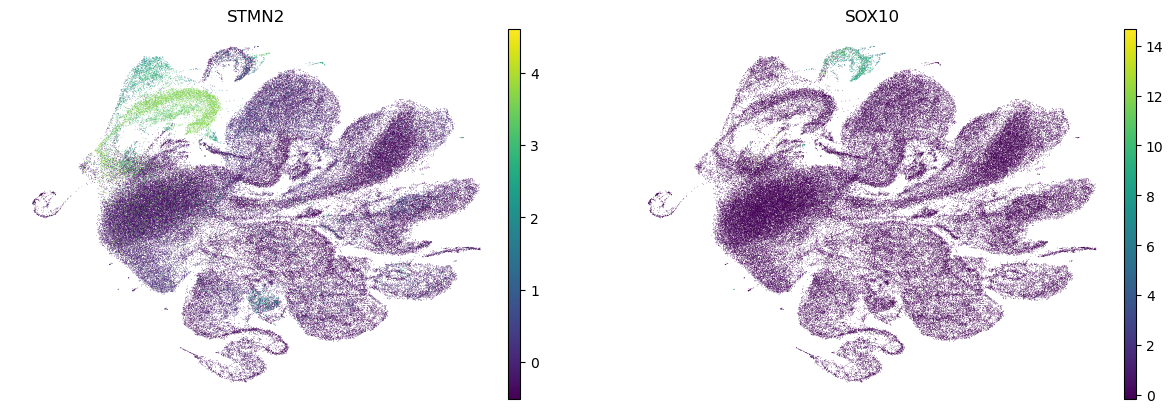

In [17]:
sc.pl.umap(adata, color=["STMN2", "SOX10"], use_raw=False, frameon=False)